In [8]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [9]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST('F_MNIST_data/',download = True, train = True, transform = transform)
testset  = datasets.FashionMNIST('F_MNIST_data/',download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader  = torch.utils.data.DataLoader(testset , batch_size = len(testset), shuffle = True)

In [10]:
idx,img= next(enumerate(trainloader))

In [11]:
img[0]

torch.Size([64, 1, 28, 28])

In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
                        nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride = 1, padding = 0 , dilation = 1),
                        nn.ReLU(inplace = True),
                        nn.MaxPool2d(kernel_size = 2),
                        nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 1, padding = 0 , dilation = 1),
                        nn.ReLU(inplace = True),
                        nn.MaxPool2d(kernel_size = 2)              
        )
        self.linear = nn.Sequential(
                        nn.Linear(400,256),
                        nn.Linear(256,64),
                        nn.Linear(64,10)
        )
    def forward(self,x):
        x = self.conv(x)
        x = x.view(x.shape[0],-1)
        print(x.shape)
        return F.log_softmax(self.linear(x),dim = 1)

def confusion_matrix(true, pred):
    uniq = np.unique(true)
    mat = np.zeros((len(uniq),len(uniq)))
    for i in range(len(uniq)):
        indicies = np.where(uniq[i] == true)
        for j in range(len(uniq)):
            mat[i,j] = len(np.where(pred[indicies] == uniq[j])[0])
    return mat

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']


model = Net()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0002)
epochs = 50
train_loss = []
test_loss  = []
train_acc  = []
test_acc   = []
verbose_idx = 100
train = 1

In [13]:
out = model(img[0])

torch.Size([64, 400])


In [ ]:
model.

In [7]:
if train :
    for e in range(epochs):
        running_loss = 0
        for idx, data in enumerate(trainloader):
            log_ps = model(data[0])
            loss = criterion(log_ps, data[1])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if (idx % verbose_idx == 0):
                print("Epoch: {}, Idx: {}, Train loss: {}".format(e, idx, loss.item()))        
        train_loss.append(running_loss / len(trainloader))
        running_loss = 0
        acc = 0
        with torch.no_grad():
            for idx, data in enumerate(testloader):
                log_ps = model(data[0])
                loss = criterion(log_ps, data[1])
                running_loss += loss.item()
                var = torch.exp(log_ps).max(1)[1]
                acc += var.eq(data[1].data.view_as(var)).sum()
            test_loss.append(running_loss / len(testloader))
        print("Epoch: {}, Train Loss: {}, Test Loss: {}, Acc: {}".format(e,train_loss[-1],test_loss[-1],acc/len(testloader.dataset)))
    params = {'state_dict': model.state_dict() , 'train_loss': train_loss,  'test_loss': test_loss}
    torch.save(params, "q2.pth")
else : 
    file_path = 'q2.pth'
    params = torch.load(file_path)
    model.load_state_dict(params['state_dict'])
    train_loss = params['train_loss']
    test_loss = params['test_loss']

NameError: name 'trainloader' is not defined

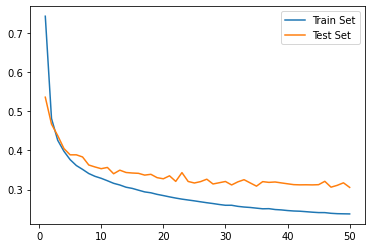

In [7]:
epochs_list = np.array(list(range(epochs))) + 1
plt.plot(epochs_list, train_loss,label = 'Train Set')
plt.plot(epochs_list, test_loss, label = 'Test Set' )
plt.legend()
plt.show()

In [8]:
idx, data = next(enumerate(testloader))
probs = model(data[0])
pred = torch.exp(probs).data.max(1)[1]
print("Test Accuracy: {}".format(pred.eq(data[1].data.view_as(pred)).sum() / len(testloader.dataset)))
mat = confusion_matrix(data[1].numpy(), pred.numpy())

Test Accuracy: 0.8921999931335449


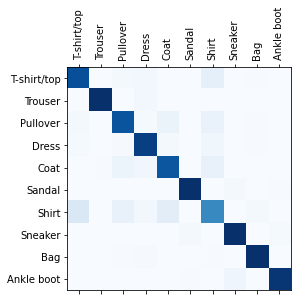

[[857.   1.  18.  29.   2.   1.  85.   0.   7.   0.]
 [  1. 969.   0.  24.   3.   0.   1.   0.   2.   0.]
 [ 17.   1. 838.  13.  61.   0.  66.   0.   4.   0.]
 [ 13.   2.  10. 916.  18.   0.  36.   0.   5.   0.]
 [  2.   4.  52.  34. 834.   1.  70.   0.   2.   1.]
 [  0.   0.   0.   0.   0. 975.   1.  19.   1.   4.]
 [139.   2.  69.  29. 101.   0. 642.   0.  18.   0.]
 [  0.   0.   0.   0.   0.  18.   0. 970.   0.  12.]
 [  2.   2.   4.   8.   2.   1.   6.   3. 972.   0.]
 [  0.   0.   0.   0.   0.   6.   1.  44.   0. 949.]]


In [9]:
plt.matshow(mat,cmap = plt.cm.Blues)
plt.xticks(range(10),classes,rotation= 'vertical')
plt.yticks(range(10),classes)
plt.show()
print(mat)